In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
start = '2015-01-01'
end = '2024-03-08'
stock = 'GOOG'

data = yf.download(stock, start, end)

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [35]:
data.reset_index(inplace=True)

In [36]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,26.378078,26.490770,26.133251,26.168653,26.168653,28951268
1,2015-01-05,26.091366,26.144720,25.582764,25.623152,25.623152,41196796
2,2015-01-06,25.679497,25.738087,24.983908,25.029282,25.029282,57998800
3,2015-01-07,25.280592,25.292759,24.914099,24.986401,24.986401,41301082
4,2015-01-08,24.831326,25.105074,24.482782,25.065184,25.065184,67071641
...,...,...,...,...,...,...,...
2305,2024-03-01,139.610001,140.000000,137.975006,138.080002,138.080002,28522000
2306,2024-03-04,136.539993,136.630005,132.860001,134.199997,134.199997,43571500
2307,2024-03-05,132.740005,134.020004,131.550003,133.779999,133.779999,28447600
2308,2024-03-06,134.240005,134.740005,131.949997,132.559998,132.559998,23175200


In [37]:
ma_100_days = data.Close.rolling(100).mean()

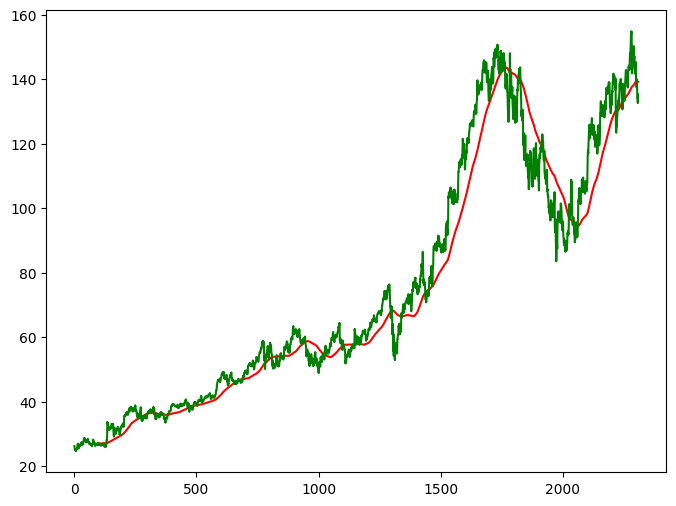

In [38]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [39]:
ma_200_days = data.Close.rolling(200).mean()

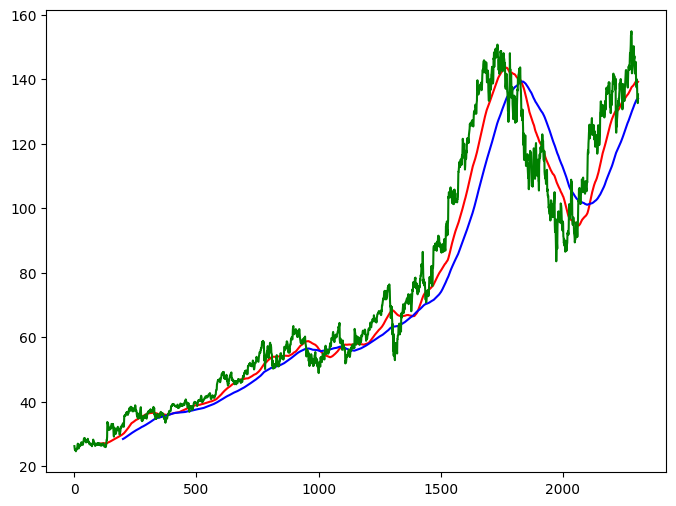

In [40]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [41]:
data.dropna(inplace=True)

In [42]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [43]:
data_train.shape[0]

1848

In [44]:
data_test.shape[0]

462

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [48]:
x, y = np.array(x), np.array(y)

In [49]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - loss: 0.0727
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 123ms/step - loss: 0.0096
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - loss: 0.0062
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0053
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0044
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0046
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0066
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0048
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - loss: 0.0051
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 122ms/step - loss: 0.0042
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - loss: 0.0043
Epoch 12/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0037
Epoch 13/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 0.0043
Epoch 14/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - loss: 0.0034
Epoch 15/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - l

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [54]:
pas_100_days = data_train.tail(100)

In [55]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [56]:
data_test_scale  =  scaler.fit_transform(data_test)

In [57]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [58]:
y_predict = model.predict(x)

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step


In [59]:
scale =1/scaler.scale_

In [60]:
y_predict = y_predict*scale

In [61]:
y = y*scale

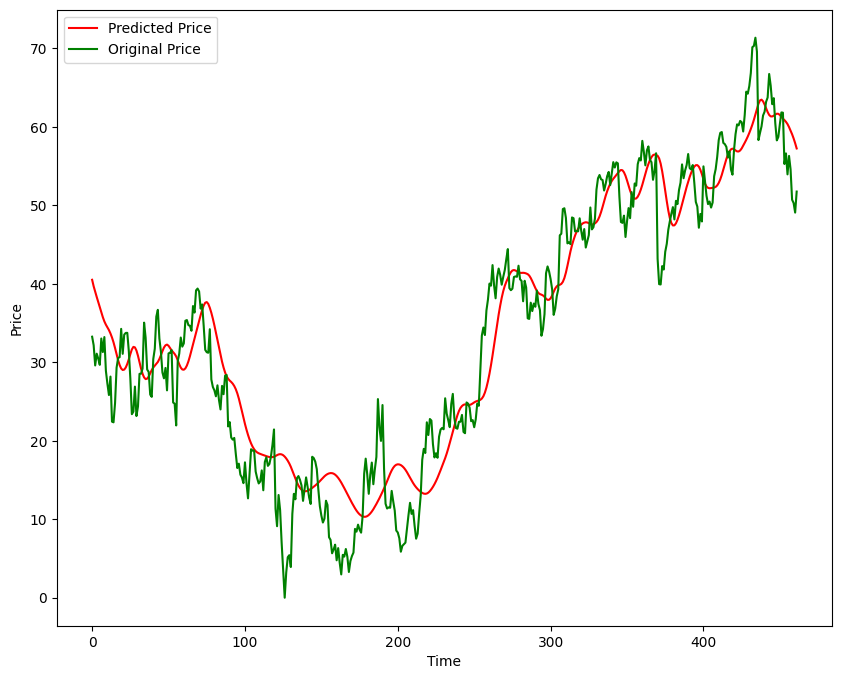

In [62]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
import streamlit as st

c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


DeltaGenerator()

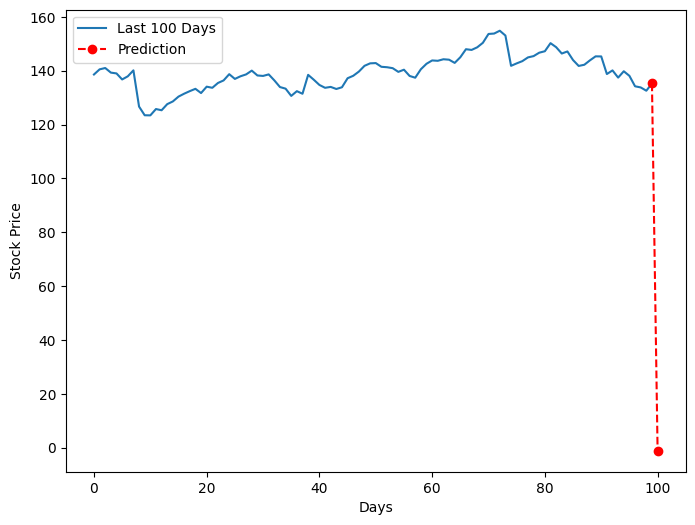

In [69]:
# Display the results
# Extract last 100 days of closing prices
last_100_days = data.Close.tail(100).values.reshape(-1, 1)

# Scale the data using the MinMaxScaler
last_100_days_scaled = scaler.transform(last_100_days)

# Reshape the data for the model input
input_data = last_100_days_scaled.reshape(1, -1, 1)

# Make predictions using the model
predicted_price = model.predict(input_data)

# Rescale the predicted price to the original scale
predicted_price_rescaled = predicted_price * scaler.scale_ + scaler.min_

# Get the last scaled closing price for comparison
last_scaled_price = last_100_days_scaled[-1, 0]

# Get the last original closing price for comparison
last_original_price = scaler.inverse_transform([[last_scaled_price]])[0, 0]

# Display the results
prediction_text = f"Prediction: Tomorrow's stock price is expected to {'rise' if predicted_price_rescaled > last_original_price else 'fall'}."

# Plot the original and predicted prices
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(last_100_days, label='Last 100 Days')
ax.plot([last_100_days.shape[0] - 1, last_100_days.shape[0]], [last_original_price, predicted_price_rescaled[0, 0]], label='Prediction', linestyle='dashed', marker='o', color='red')
ax.set_xlabel('Days')
ax.set_ylabel('Stock Price')
ax.legend()
st.pyplot(fig)


In [63]:
model.save('Stock Predictions Model.keras')